![Picture title](https://th.bing.com/th/id/OIP.5llZF1bRL9IhNKJY30873wHaFj?pid=ImgDet&rs=1)

### Regression

Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

### Linear Regression

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the below graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.


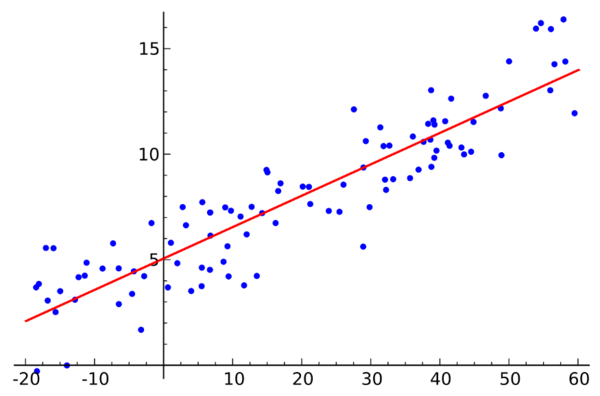

**Cost Function**


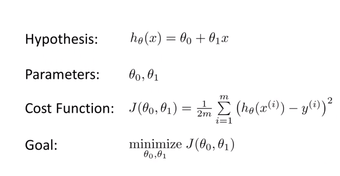

In [ ]:
import math
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

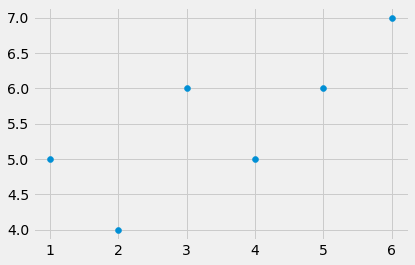

In [ ]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)
plt.scatter(xs, ys)
plt.show()

In [ ]:
ys

array([5., 4., 6., 5., 6., 7.])

![](https://pythonprogramming.net/static/images/machine-learning/best-fit-slope.png)

![]()

![](https://pythonprogramming.net/static/images/machine-learning/best-fit-y-intercept.png)

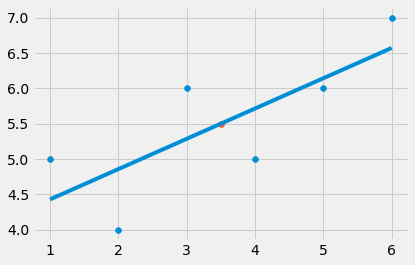

In [ ]:
def best_fit_slope(xs, ys):
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs)*mean(xs) - mean(xs*xs)) 
    return m
def calculate_b(xs, ys):
    b = mean(ys) - m*mean(xs)
    return b

m = best_fit_slope(xs, ys)
b = calculate_b(xs, ys)

regression_line = [(m * x) + b for x in xs]

plt.plot(xs, regression_line)
plt.scatter(xs,ys)
predict_x = 3.5
predict_y = m*predict_x + b
predict_y
plt.scatter(predict_x, predict_y)


Text(0, 0.5, 'y values')

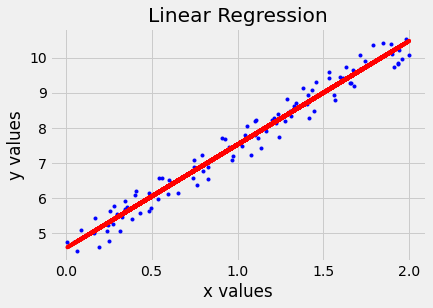

In [ ]:
#Performing linear Regression using Scikit learn


import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100,1)

lin_reg = LinearRegression()
lin_reg.fit(x, y)

lin_reg.intercept_, lin_reg.coef_

plt.plot(x, y, 'b.')
plt.plot(x, lin_reg.predict(x), 'r-')
plt.title('Linear Regression')
plt.xlabel('x values')
plt.ylabel('y values')

**Types of Regression in Machine Learning**

There are different types of regression(considering both univariate and multivariate variables).

*  Linear Regression: Simple linear regression a target variable based on the independent variables. Linear regression is a machine learning algorithm based on supervised learning which performs the regression task.
  
* Polynomial Regression: Polynomial regression transforms the original features into polynomial features of a given degree or variable and then apply linear regression on it.

* Support Vector Regression: Support vector regression identifies a hyperplane with the maximum margin such that the maximum number of data points is within the margin.
![](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png)
* Decision Tree Regression: The decision tree is a tree that is built by partitioning the data into subsets containing instances with similar values. It can use for regression and classification also.
![](https://media.geeksforgeeks.org/wp-content/uploads/decision-tree.jpg)
* Random Forest Regression:Random Forest is an ensemble approach where we take into account the predictions of several decision regression trees.
![](https://assets.website-files.com/5e6f9b297ef3941db2593ba1/5f63147034f9b3f3fa224e79_Screenshot%202020-09-17%20at%2009.46.38.png)

### Polyomial Regression
What if your data is actually more complex than a simple straight line?

Suprisingly we can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each features, then train a linear model on this extended set od features. This technique is called Polynomial Regression.

Below figure applies a 300-degree polynomial model to the precedinf training data, and compares the resulty with a pure linear model and a quadratic model.

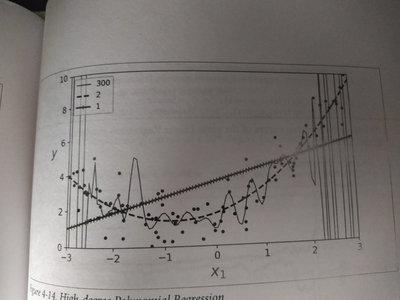

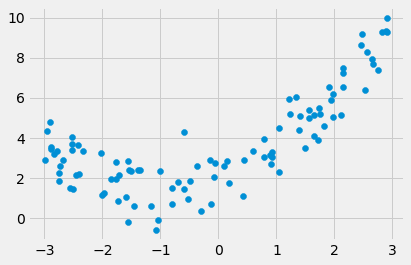

In [ ]:
m = 100
x_values = 6 * np.random.rand(m, 1) - 3
y_values = 0.5 * x_values **2 + x_values + 2 + np.random.randn(m, 1)
plt.scatter(x_values, y_values)

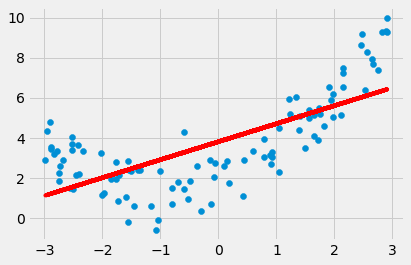

In [ ]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, line_reg.predict(x_values), 'r-')

PolynomialFeatures()


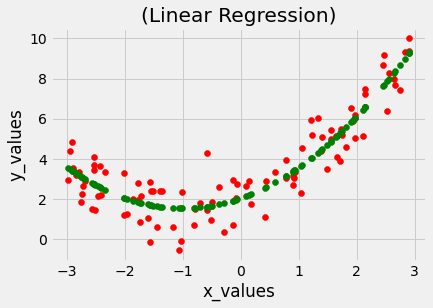

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression




# theta = theta2 * x_square + theta1 + 2 *  theta0

poly_reg = PolynomialFeatures(degree=2)
print(poly_reg)
X_poly = poly_reg.fit_transform(x_values)
# print(x_values[0])
# print(X_poly[0])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_values)

pol_reg.intercept_, pol_reg.coef_

# #Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x_values, y_values, color='red')
    plt.scatter(x_values, pol_reg.predict(poly_reg.fit_transform(x_values)), color='green')
    plt.title('(Linear Regression)')
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.show()
    return
viz_polymonial()


### Learning Curves
These are the plots of the model's performance on the training set and the validation set as a function of the training set size.
To generate the plots simply train the model several times on different sized subsets of the training set. 
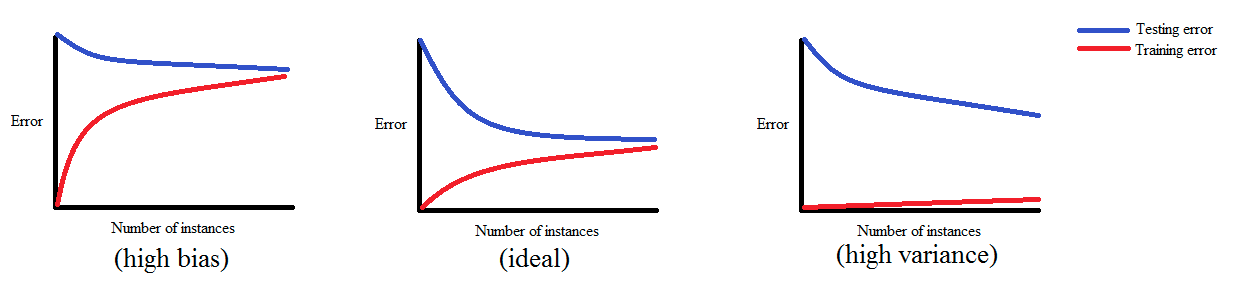

In [ ]:
# For the below We are just exporting and naming them individually but not passing the hyperparameter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_reg_1 = LinearRegression()
poly_reg_1 = PolynomialFeatures()

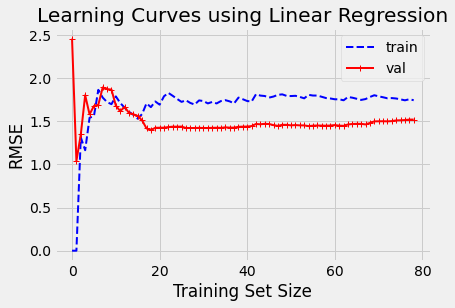

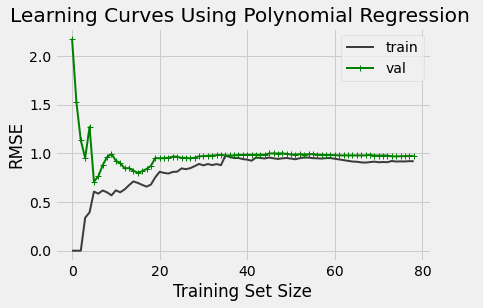

In [ ]:
#Here we will use the data of the above linear and polynomial regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves_linear(model, x, y,colors):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range (1, len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    
    y_train_predict = model.predict(x_train[:m])
    y_val_predict = model.predict(x_val[:m])
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val[:m], y_val_predict))

  plt.plot(np.sqrt(train_errors), colors[0], linewidth = 2, label = 'train')
  plt.plot(np.sqrt(val_errors), colors[1], linewidth = 2, label = 'val')

def plot_learning_curves_poly(model, x, y,colors):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range (1, len(x_train)):
    X_poly = model.fit_transform(x_train[:m])
    lin_reg_1.fit(X_poly, y_train[:m])
    
    y_train_predict = lin_reg_1.predict(poly_reg_1.fit_transform(x_train[:m]))
    y_val_predict = lin_reg_1.predict(poly_reg_1.fit_transform(x_val[:m]))
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val[:m], y_val_predict))

  plt.plot(np.sqrt(train_errors), colors[0], linewidth = 2, label = 'train')
  plt.plot(np.sqrt(val_errors), colors[1], linewidth = 2, label = 'val') 

plt.title('Learning Curves using Linear Regression')
plot_learning_curves_linear(lin_reg_1, x_values, y_values,colors=['b--','r-+'])
plt.legend(['train', 'val'])
plt.ylabel("RMSE")
plt.xlabel("Training Set Size")
plt.show()

plt.title('Learning Curves Using Polynomial Regression ')
plot_learning_curves_poly(poly_reg_1,x_values , y_values,colors=['#3c3c3c','g-+'] )
plt.legend(['train', 'val'])
plt.ylabel("RMSE")
plt.xlabel("Training Set Size")
plt.show()


### Overfitting and UnderFitting
> If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then our model is overfitting.

> If our model is performing poorly on both then it is underfitting.

Remedies
> If a model is overfitting adding more training examples is a significant option.

> If a model is underfitting making a complex model or coming up with better features is a sigificant option

#### Regularized Linear Models
A good way to reduce overfitting is to regularize the mode(i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

e.g., a simple way to regularize a polynomial model is to reduce the number of polynomial degrees

Three different ways to constrain weights:
* Ridge Regression
* Lasso Regression
* Elastic Net




**Ridge Regression**

A regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

*The regularization term should be added only to the cost function during the training.*




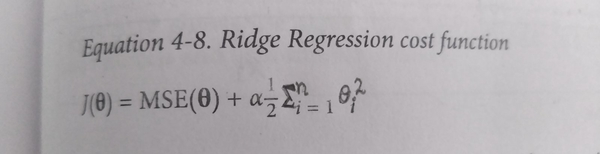

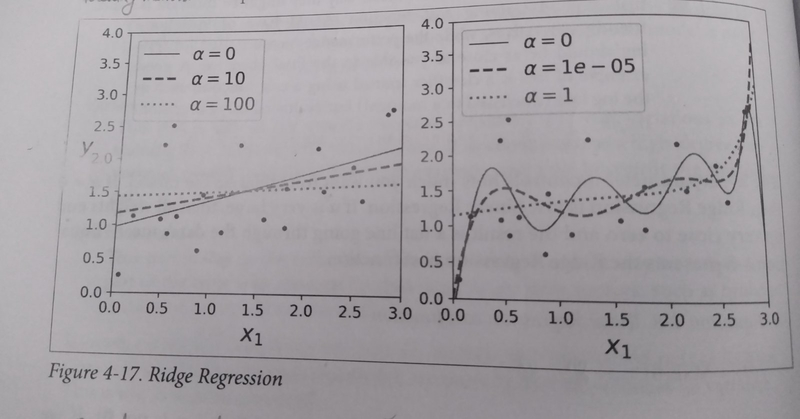

**Lasso Regression**

*Least Absolute Shrinkage and Selection Operator Regression* is another regularized version, it also adds a regularization term to the cost function, but it uses the l1 norm.

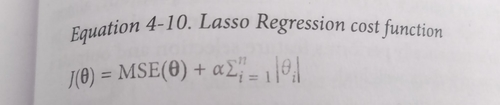

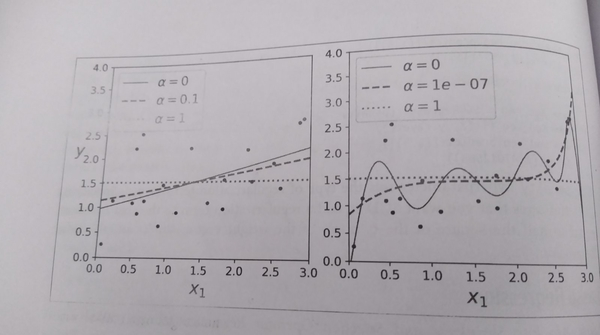

**Elastic Net**

Middle ground between Ridge Regression and Lasso Regression.


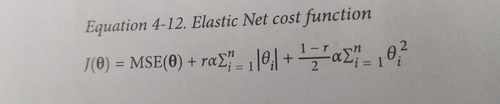

*Plain, Ridge, Lasso or Elastic Net?*

It is always preferable to have at least a little bit of regularization, so generally avoid plain Linear Regression.

> Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net.

**Early Stopping**


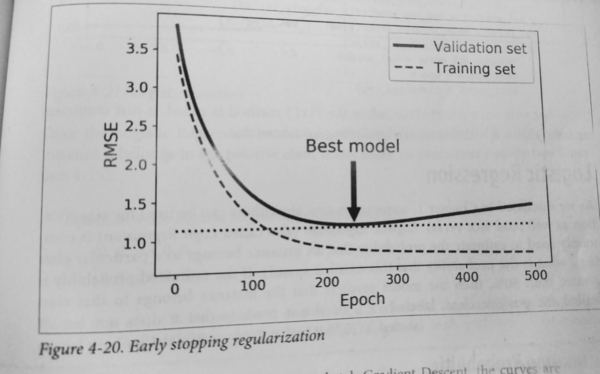

**Performance measure for Regression Problems**
1. Mean Absolute Error(MAE)

> Simplest error metric used in regression problems. It is basically the sum of the average of the absolute difference between the predicted and actual values.

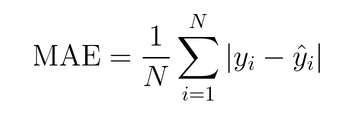

2. Mean Square Error(MSE)

> The average of the squared difference between the target value and the value predicted by the regression model.

> As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. It is preferred more than other metrics because it is differentiable and hence can be optimized better.

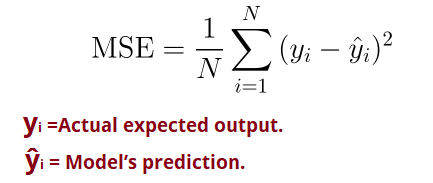

3. Root Mean Square Error(RMSE)

>RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model.

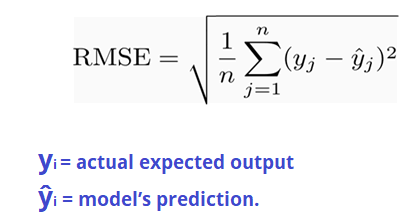

4. R-square or Coefficient of Determination

>It is known as the coefficient of determination. It is a statistical measure of how close the data are to the fitted regression line Or indicates the goodness of fit of a set of predictions to the actual values. The value of R² lies between 0 and 1 where 0 means no-fit and 1 means perfectly-fit.

>R-squared is calculated by dividing the sum of squares of residuals (SSres) from the regression model by the total sum of squares (SStot) of errors from the average model and then subtract it from 1.

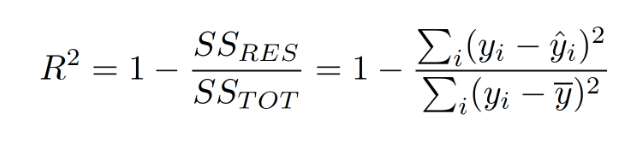

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Y_actual = [5, -1, 2, 10]
Y_predic = [3.5, -0.9, 2, 9.9]

print ('R Squared =',r2_score(Y_actual, Y_predic)) # The more near to 1 the better is our model
print ('MAE =',mean_absolute_error(Y_actual, Y_predic))
print ('MSE =',mean_squared_error(Y_actual, Y_predic))

R Squared = 0.9656060606060606
MAE = 0.42499999999999993
MSE = 0.5674999999999999


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57949008-d14a-4ee2-8f47-e94cc0939f85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>